## Image Segmentation using Mean Shift Clustering
The use of mean shift clustering (MSC) in image segmentation is a well-known method in computer vision that divides an image into meaningful zones according to color and space. 

### Mean Shift Clustering
Mean shift clustering is a method used to find clusters in data without specifying the number of clusters beforehand. Mean shift clustering is a non-parametric, reiterative algorithm that seeks to identify groups in a dataset by discovering the sharper peaks in a density function, when, unlike some clustering algorithms, it does not require a piece of prior knowledge on the number of categories.

### Why this clustering for image segmentation?
It is a non-parametric, unsupervised method that effectively identifies the modes or high-density regions of data, which correspond to the different segments in an image.  By iteratively shifting data points towards the average of points within a given window, mean shift clustering can discover arbitrarily shaped clusters without assuming a specific number of clusters beforehand. This makes it particularly suitable for image segmentation, where the goal is to partition the image into meaningful regions based on pixel intensity and color.

### Mean Shift Algorithm
`Given`: Distribution of $N$ pixels in feature space.  
`Task`: Find modes(clusters) of the distribution.  
`Clustering`:  
1. Set $m_i = f_i$ as initial mean for each pixel $i$.
2. Repeat the following for each mean $m_i$:
    - Place window of size $W$ around $m_i$.
    - Compute Centroid $m$ within the window. Set $m_i = m$.
    - Stop if shift in mean $m_i$ is less than a threshold $e$. $m_i$ is the mode.
3. Label all pixels that have same mode as belonging to same cluster.



## Implementation

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

**Load the Image**

In [49]:
# Load the image
image_path = './images/heart.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**Convert the image from RGB to Lab color space for better clustering.**

In [50]:
# Convert image to L*a*b* color space
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  

In [51]:
# Flatten the image
flat_image = lab_image.reshape((-1, 3))


In [52]:
flat_image.shape

(121320, 3)

**Create Feature Space**  
Create a feature space that includes the Lab* values and the (x, y) coordinates of each pixel.

In [53]:
# Create the feature space [L, a, b, x, y]
height, width, _ = image.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))
flat_image_with_coordinates = np.column_stack([flat_image, x.flatten(), y.flatten()])

In [54]:
flat_image_with_coordinates.shape

(121320, 5)

In [55]:
#Estimate the bandwidth parameter for the Mean Shift algorithm
bandwidth = estimate_bandwidth(flat_image_with_coordinates, quantile=0.2, n_samples=500)

In [56]:
print(f"Estimated Bandwidth: {bandwidth}")

Estimated Bandwidth: 147.93371455236394


In [57]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(flat_image_with_coordinates)
labels = mean_shift.labels_

In [58]:
# Reshape the labels to the original image shape
segmented_image = labels.reshape((height, width))

In [59]:
segmented_image.shape

(337, 360)

In [60]:
segmented_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
# Generate a colored segmented image
unique_labels = np.unique(labels)
segmented_colors = np.random.randint(0, 255, size=(len(unique_labels), 3))
colored_segmented_image = segmented_colors[segmented_image]

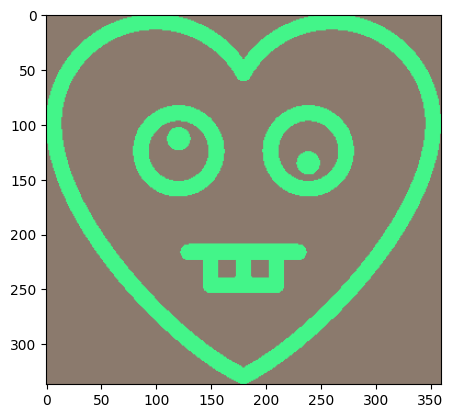

In [62]:
plt.imshow(colored_segmented_image)